# ---------------------------------------------------------------------------------------------------------------

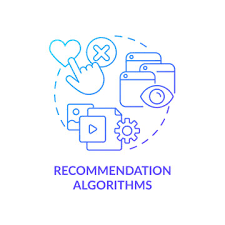

## Machine Learning Tutorials using Python
## Designed by : maktabkhooneh.org
## Tutor : Jadi Mirani
## Learner : Aref Jozi
## Season 5 : Recommender Systems

#### This is my tutorial project of a dataset including some features about "movies"  based on imdb data sources which are two datasets namely "movies" and"ratings". 
#### The purpose is to creat a recommendation system including "content based method" and "collaborative based method" in order to suggest movies to users based on their interests, also giving furthur detail and information in this project is a task valued by mentors.

#### Done by Aref Jozi on Jan 2023

#### This project is designed by collaboration of maktabkhooneh and Jadi and represented in Season 5 (Recommender Systems) of Machine Learning by Python

# ---------------------------------------------------------------------------------------------------------------

# Part1 : Content-based Recommendation System

# ---------------------------------------------------------------------------------------------------------------

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### The purpose in this project is to suggest the user some new movies based on the movies and genres he or she has rated from 1.0 to 5.0. The basis of this suggestion is resemblance between the movies and their genres which is named content-based recommendation system.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## Program steps >>>
- importing libraries
- importing datasets(csv files) and getting some information about them
- pre-processing and data cleansing
- creating content-based recommendation system

## importing libraries

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

importing essential libraries for manipulation and math functions i.e sqrt.
the libraries that we need are pandas, math, numpy, and matploylib
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     # >>>not necessary

UsageError: unrecognized arguments: # >>>not necessary


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
defining dataframes via pandas to store the given csv files into our program. 
movie_df is used for movies' information and ratings_df is used for users' information.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## importing datasets(csv files) and getting some information about them

In [2]:
movies_df = pd.read_csv('e:/movies.csv')
ratings_df = pd.read_csv('e:/ratings.csv')

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
now 5 rows of these datasets will be illustrated to give some brief information about the DFs. then some features will be extracted using functions for more familiarizing with the data(ex: .shape , .info , etc.)
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df.shape

(9742, 3)

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings_df.shape

(100836, 4)

In [9]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

As it is depicted in the above code lines, movies_df has 9742 samples(movie titles) and ratings_df has 100836 samples (movie ratings from 610 users).for example, in ratings_df in line 0(index=0),user 1 has given 4.0 points to the movie with movieid=1 which is toy story.besides timestamp is the epoch (the seconds past from 1980) which is useless in our analysis.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## pre-processing and data cleansing

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

So now that we are familiarized with the datasets and know how to manage functions on them, we will select the features that are
needed for our recommendaton system and remove the features that are useless. this task is called "data cleansing"

to remove the elements that are not useful for our system we can use "Regex" method. Regex can be used to add, remove, isolate, and manipulate all kinds of text and data. It could be used as a simple text editor command, e.g., search and replace and ...

first we should split years which are attached to movie titles and put them in a new column. 
so let's use regular expressions to find a year stored between parentheses
. besides we specify the parantheses so we don't conflict with movies that have years in their titles. 

"\ d"   means a digit.   " \ ( "  means an open parentheses
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


The steps are : step 1 removig the years. step 2 Removing the parentheses. step 3 Removing the years from the 'title' column.step 4 Applying the strip function to get rid of any ending whitespace characters that may have appeared.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### cleaning  "movies_df"

In [11]:
# step 1 removig the years
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
# step 2 Removing the parentheses
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False)
# step 3 Removing the years from the 'title' column
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')
# step 4 Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip())
movies_df.head()

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13036/3580518445.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '')


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Every genre is separated by a | so we simply have to call the split function on | to put them in a list.With that, let's also split the values in the Genres column into a list of Genres to simplify for future use. This can be achieved by applying Python's split string function on the correct column.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [12]:
movies_df['genres'] = movies_df.genres.str.split('|')
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

As shown in the above dataframe, genres are in a list inside a column which is not the best way (not optimized) to show information for a recommendation system's analysis, therefore we have to use a technique to convert this list's elements into separate columns to act better in latter codes.

in other words, we have to assign 0.0 and 1.0 to not specified and specified respectively to every genre related to a movie.for example movie X is a sci-fi and adventure movie, so the column of genres: "sci-fi" and "adventure" have the values of 1.0 and other genre columns have 0.0 values.

this method is conducted so that in the next steps we be able to multiply these values with other variables.actually these 0.0 s and 1.0 s are coefficients to determine the existance of a genre in a movie.however firstly we store these coefficients in another variable as shown below.

Actually the first for loop is to recognize movie_df and the second for loop is to determine every genre which exists in the specified movie gets a 1.0 and other get 0.0 .

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The steps are : 1.Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.so lets make a copy of the dataframe. 2.For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column. 3.Filling in the NaN values with 0 to show that a movie doesn't have that column's genre

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [13]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
# so lets make a copy of the dataframe
moviesWithGenres_df = movies_df.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies_df.iterrows():
    for genre in row['genres']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### cleaning "ratings_df"

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column.let's drop it to save memory so that our dataset get cleaned :) :) :)
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [14]:
#Drop removes a specified row or column from a dataframe
ratings_df = ratings_df.drop('timestamp', 1)
ratings_df.head()

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13036/3391429438.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ratings_df = ratings_df.drop('timestamp', 1)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We could use timestamp column for the movies that are newer than others to be suggested more if the user is a person who watches new films more than the old ones.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


## creating content-based recommendation system

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Now, let's take a look at how to implement Content-Based or Item-Item recommendation systems. This technique attempts to figure out what a users favourite aspects of an item is, and then recommends items that present those aspects. In our case, we're going to try to figure out the input's favorite genres from the movies and ratings given.

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .
The procedure is that the user enters some data about his or her favorite movies and the score that he or she has assigned to them.so the program will find the most similar movies to this input file based on the score and the included genres.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5



#### Add movieId to input user
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


With the input complete, let's extract the input movie's ID's from the movies dataframe and add them into it.

We can achieve this by first filtering out the rows that contain the input movie's title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The steps are: 1.Filtering out the movies by title. 2.merging it so we can get the movieId. It's implicitly merging it by title.3.Dropping information we won't use from the input dataframe. 4.Final input dataframe If a movie you added in above isn't here, then it might not be in the original dataframe or it might spelled differently, please check capitalisation.


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The procedure is: 

inputid is equal to : select the movies that exist in the input file that the user has inserted, then make a list out of them.
then put input idea and input movies in a single dataframe.then remove genres and year columns because their existance is not necessary.


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
#Filtering out the movies by title
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13036/2071048360.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  inputMovies = inputMovies.drop('genres', 1).drop('year', 1)


,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Now we have a dataframe that includes movieid,title and the rating that the user has given to the program.

In the next code line we are going to assign 1.0 and 0.0 to the genres of the movies in the inputmovies dataframe to make it ready for multiplying its rating column into user genre table ,as shown.


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,296,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,1274,Akira,"[Action, Adventure, Animation, Sci-Fi]",1988,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1445,1968,"Breakfast Club, The","[Comedy, Drama]",1985,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Now we should reset the index and just holding genres by removing other columns
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13036/2641803640.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
inputMovies['rating']

0    3.5
1    2.0
2    5.0
3    4.5
4    5.0
Name: rating, dtype: float64

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Now it is time to multiply a matrix named usergenretable which includes only the user's selected movie genres into the ratings matrix of the same movies
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             10.0
Animation              8.0
Children               5.5
Comedy                13.5
Fantasy                5.5
Romance                0.0
Drama                 10.0
Action                 4.5
Crime                  5.0
Thriller               5.0
Horror                 0.0
Mystery                0.0
Sci-Fi                 4.5
War                    0.0
Musical                0.0
Documentary            0.0
IMAX                   0.0
Western                0.0
Film-Noir              0.0
(no genres listed)     0.0
dtype: float64

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
So we have to do the same works on the Genretable:

1.get the genres of every movie in our original dataframe

2.drop the unnecessary information
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [21]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

C:\Users\Albaloo.Co\AppData\Local\Temp/ipykernel_13036/789887408.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)


,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
genreTable.shape

(9742, 20)

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
In the last step we should multiply the weighted matrix which was made in the previous session and then sort the recommendations in descending order and  giving the user the 20 final recommended movies.
in the following code lines some simple mathematical functions are implemented that seem to be a piece of cake for you to understand them :)
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movieId
1    0.594406
2    0.293706
3    0.188811
4    0.328671
5    0.188811
dtype: float64

In [24]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movieId
134853    0.734266
148775    0.685315
117646    0.678322
6902      0.678322
81132     0.671329
dtype: float64

In [25]:
#The final recommendation table
movies_df.loc[movies_df['movieId'].isin(recommendationTable_df.head(20).keys())]

,movieId,title,genres,year
559,673,Space Jam,"[Adventure, Animation, Children, Comedy, Fanta...",1996
1390,1907,Mulan,"[Adventure, Animation, Children, Comedy, Drama...",1998
2250,2987,Who Framed Roger Rabbit?,"[Adventure, Animation, Children, Comedy, Crime...",1988
3460,4719,Osmosis Jones,"[Action, Animation, Comedy, Crime, Drama, Roma...",2001
4631,6902,Interstate 60,"[Adventure, Comedy, Drama, Fantasy, Mystery, S...",2002
5490,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed...",1976
5819,32031,Robots,"[Adventure, Animation, Children, Comedy, Fanta...",2005
6047,40339,Chicken Little,"[Action, Adventure, Animation, Children, Comed...",2005
6448,51939,TMNT (Teenage Mutant Ninja Turtles),"[Action, Adventure, Animation, Children, Comed...",2007
6455,52287,Meet the Robinsons,"[Action, Adventure, Animation, Children, Comed...",2007


## ----------------------------------------------------------------------------------------------------------------------------------
# The summerized explanation of this program's codes >>>

- importing libraries
- importing datasets(csv files) and getting some information about them
- data cleansing
- creating content-based recommendation system

#### importing libraries and importing datasets(csv files) and getting some information about them

1.The purpose in this project is to suggest the user some new movies based on the movies and genres he or she has rated from 1.0 to 5.0. The basis of this suggestion is resemblance between the movies and their genres which is named content-based recommendation system.

2.importing essential libraries for manipulation and math functions i.e sqrt. the libraries that we need are pandas, math, numpy, and matploylib.

3.defining dataframes via pandas to store the given csv files into our program. movie_df is used for movies' information and ratings_df is used for users' information

4.now 5 rows of these datasets will be illustrated to give some brief information about the DFs. then some features will be extracted using functions for more familiarizing with the data(ex: .shape , .info , etc.)

5.As it is depicted in the above code lines, movies_df has 9742 samples(movie titles) and ratings_df has 100836 samples (movie ratings from 610 users).for example, in ratings_df in line 0(index=0),user 1 has given 4.0 points to the movie with movieid=1 which is toy story.besides timestamp is the epoch (the seconds past from 1980) which is useless in our analysis.

#### pre-processing and data cleansing

6.So now that we are familiarized with the datasets and know how to manage functions on them, we will select the features that are needed for our recommendaton system and remove the features that are useless. this task is called "data cleansing"

to remove the elements that are not useful for our system we can use "Regex" method. Regex can be used to add, remove, isolate, and manipulate all kinds of text and data. It could be used as a simple text editor command, e.g., search and replace and ...

first we should split years which are attached to movie titles and put them in a new column. so let's use regular expressions to find a year stored between parentheses . besides we specify the parantheses so we don't conflict with movies that have years in their titles.

"\ d" means a digit. " \ ( " means an open parentheses

The steps are : step 1 removig the years. step 2 Removing the parentheses. step 3 Removing the years from the 'title' column.step 4 Applying the strip function to get rid of any ending whitespace characters that may have appeared

7.Every genre is separated by a | so we simply have to call the split function on | to put them in a list.With that, let's also split the values in the Genres column into a list of Genres to simplify for future use. This can be achieved by applying Python's split string function on the correct column.

8.As shown in the above dataframe, genres are in a list inside a column which is not the best way (not optimized) to show information for a recommendation system's analysis, therefore we have to use a technique to convert this list's elements into separate columns to act better in latter codes.

in other words, we have to assign 0.0 and 1.0 to not specified and specified respectively to every genre related to a movie.for example movie X is a sci-fi and adventure movie, so the column of genres: "sci-fi" and "adventure" have the values of 1.0 and other genre columns have 0.0 values.

this method is conducted so that in the next steps we be able to multiply these values with other variables.actually these 0.0 s and 1.0 s are coefficients to determine the existance of a genre in a movie.however firstly we store these coefficients in another variable as shown below.

the first for loop is to recognize movie_df and the second for loop is to determine every genre which exists in the specified movie gets a 1.0 and others get 0.0.

9.Every row in the ratings dataframe has a user id associated with at least one movie, a rating and a timestamp showing when they reviewed it. We won't be needing the timestamp column.let's drop it to save memory so that our dataset get cleaned :) :) :)

We could use timestamp column for the movies that are newer than others to be suggested more if the user is a person who watches new films more than the old ones.

#### creating content-based recommendation system

10.Now, let's take a look at how to implement Content-Based or Item-Item recommendation systems. This technique attempts to figure out what a users favourite aspects of an item is, and then recommends items that present those aspects. In our case, we're going to try to figure out the input's favorite genres from the movies and ratings given.

Let's begin by creating an input user to recommend movies to:

Notice: To add more movies, simply increase the amount of elements in the userInput. Feel free to add more in! Just be sure to write it in with capital letters and if a movie starts with a "The", like "The Matrix" then write it in like this: 'Matrix, The' .

The procedure is that the user enters some data about his or her favorite movies and the score that he or she has assigned to them.so the program will find the most similar movies to this input file based on the score and the included genres.

11.With the input complete, let's extract the input movie's ID's from the movies dataframe and add them into it.

We can achieve this by first filtering out the rows that contain the input movie's title and then merging this subset with the input dataframe. We also drop unnecessary columns for the input to save memory space.

The steps are: 1.Filtering out the movies by title. 2.merging it so we can get the movieId. It's implicitly merging it by title.3.Dropping information we won't use from the input dataframe. 4.Final input dataframe If a movie you added in above isn't here, then it might not be in the original dataframe or it might spelled differently, please check capitalisation.

The procedure is:

inputid is equal to : select the movies that exist in the input file that the user has inserted, then make a list out of them. then put input idea and input movies in a single dataframe.then remove genres and year columns because their existance is not necessary.

12.Now we have a dataframe that includes movieid,title and the rating that the user has given to the program.

In the next code line we are going to assign 1.0 and 0.0 to the genres of the movies in the inputmovies dataframe to make it ready for multiplying its rating column into user genre table ,as shown.

Now it is time to multiply a matrix named usergenretable which includes only the user's selected movie genres into the ratings matrix of the same movies



13.So we have to do the same works on the Genretable:

1.get the genres of every movie in our original dataframe

2.drop the unnecessary information

14.In the last step we should multiply the weighted matrix which was made in the previous session and then sort the recommendations in descending order and giving the user the 20 final recommended movies. in the following code lines some simple mathematical functions are implemented that seem to be a piece of cake for you to understand them :)